In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_file/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'Length of Cities: \n{len(cities)}')
len(cities)

Length of Cities: 
606


606

In [4]:
# Create a dictionary of the cities
cities_dictionary = {"City": cities}

# Create a data frame of the cities
cities_df = pd.DataFrame(cities_dictionary)

cities_df.head()

,City
0,saldanha
1,lufilufi
2,taolanaro
3,atuona
4,albany


## Perform API Calls

In [5]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [6]:
# List of city data
city_data = []

record_count = 1
set_count = 1

# Print to logger
print("Beginning Data Retrieval...  ")
print("-----------------------------")

# Loop through all the cities in the list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")


Beginning Data Retrieval...  
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | lufilufi
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | cubulero
City not found. Skipping...
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | derzhavinsk
Processing Record 16 of Set 1 | grindavik
Processing Record 17 of Set 1 | acapulco
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | mancio lima
City not found. Skipping...
Processing Record 21 of Set 1 | louga
Pro

Processing Record 33 of Set 4 | omsukchan
Processing Record 34 of Set 4 | ballina
Processing Record 35 of Set 4 | codrington
Processing Record 36 of Set 4 | camana
City not found. Skipping...
Processing Record 37 of Set 4 | smoky lake
Processing Record 38 of Set 4 | sur
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | cairo
Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | biak
Processing Record 43 of Set 4 | nanortalik
Processing Record 44 of Set 4 | nakamura
Processing Record 45 of Set 4 | ayan
Processing Record 46 of Set 4 | waikuku
Processing Record 47 of Set 4 | beni suef
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | imeni poliny osipenko
Processing Record 0 of Set 5 | srednekolymsk
Processing Record 1 of Set 5 | tukums
Processing Record 2 of Set 5 | panaba
Processing Record 3 of Set 5 | kaiyuan
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | laguna
P

Processing Record 24 of Set 8 | dolores
Processing Record 25 of Set 8 | maningrida
Processing Record 26 of Set 8 | wajir
Processing Record 27 of Set 8 | kropotkin
Processing Record 28 of Set 8 | moerai
Processing Record 29 of Set 8 | egvekinot
Processing Record 30 of Set 8 | asau
City not found. Skipping...
Processing Record 31 of Set 8 | bud
Processing Record 32 of Set 8 | mayumba
Processing Record 33 of Set 8 | kruisfontein
Processing Record 34 of Set 8 | cairns
Processing Record 35 of Set 8 | mullovka
Processing Record 36 of Set 8 | gamba
Processing Record 37 of Set 8 | morshansk
Processing Record 38 of Set 8 | portland
Processing Record 39 of Set 8 | changji
Processing Record 40 of Set 8 | amapa
Processing Record 41 of Set 8 | port elizabeth
Processing Record 42 of Set 8 | buraydah
Processing Record 43 of Set 8 | palauig
Processing Record 44 of Set 8 | lincoln
Processing Record 45 of Set 8 | nyurba
Processing Record 46 of Set 8 | yuncheng
Processing Record 47 of Set 8 | coquimbo
Pr

Processing Record 6 of Set 12 | meadow lake
Processing Record 7 of Set 12 | luderitz
Processing Record 8 of Set 12 | sakakah
City not found. Skipping...
Processing Record 9 of Set 12 | cumberland
Processing Record 10 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 12 | okhotsk
Processing Record 12 of Set 12 | xichang
Processing Record 13 of Set 12 | capaci
Processing Record 14 of Set 12 | ugoofaaru
Processing Record 15 of Set 12 | ilebo
Processing Record 16 of Set 12 | bilibino
Processing Record 17 of Set 12 | kapenguria
Processing Record 18 of Set 12 | pittsburg
Processing Record 19 of Set 12 | cabedelo
Processing Record 20 of Set 12 | delhi
Processing Record 21 of Set 12 | samana
Processing Record 22 of Set 12 | mujiayingzi
Processing Record 23 of Set 12 | gombong
Processing Record 24 of Set 12 | cheremshanka
Processing Record 25 of Set 12 | hwange
Processing Record 26 of Set 12 | gimli
Processing Record 27 of Set 12 | mingyue
Processing Record 28 of S

In [7]:
# Convert JSONs into Pandas Df
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Show Record Count
city_data_pd.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [8]:
# Convert to csv
city_data_pd.to_csv(output_file, index_label="City_ID")

In [9]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saldanha,64,PT,1543352832,91,41.42,-6.55,38.52,4.52
1,lufilufi,12,WS,1543352834,100,-13.87,-171.60,83.88,9.33
2,atuona,0,PF,1543352834,100,-9.80,-139.03,80.37,14.14
3,albany,90,US,1543352280,85,42.65,-73.75,39.02,8.05
4,tasiilaq,90,GL,1543348200,73,65.61,-37.64,26.60,12.75


## Chart 1 - Temperature (F) vs. Latitude

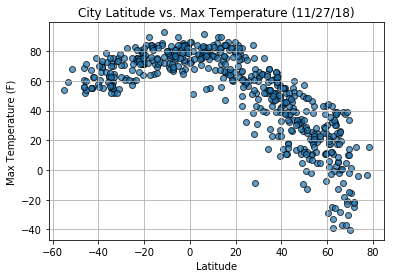

In [15]:
#Temperature (F) vs. Latitude

# Build a scatter plot for each data type
plt.scatter(lats, max_temps, marker="o", edgecolor="black", linewidths=1, alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save as image
plt.savefig("output_file/Chart1.png")

plt.show()

## Chart 2 - Humidity (%) vs. Latitude

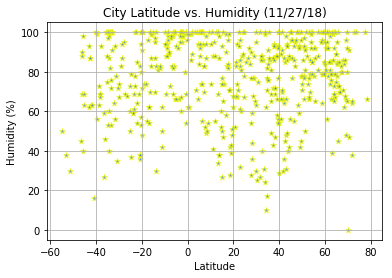

In [22]:
#Humidity (%) vs. Latitude

# Build a scatter plot for each data type
plt.scatter(lats, humidity, marker="*", edgecolor="yellow", linewidths=1, alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save as image
plt.savefig("output_file/Chart2.png")

plt.show()

## Chart 3 - Cloudiness (%) vs. Latitude

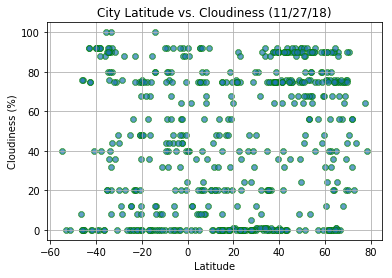

In [21]:
#Cloudiness (%) vs. Latitude

# Build a scatter plot for each data type
plt.scatter(lats, cloudiness, marker="8", edgecolor="green", linewidths=1, alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save as image
plt.savefig("output_file/Chart3.png")

plt.show()

## Chart 4 - Wind Speed (mph) vs. Latitude

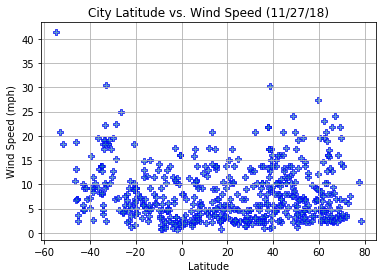

In [19]:
#Wind Speed (mph) vs. Latitude

# Build a scatter plot for each data type
plt.scatter(lats, wind_speed, marker="P", edgecolor="blue", linewidths=1, alpha=0.7, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save as image
plt.savefig("output_file/Chart4.png")

plt.show()